# We analyze different normalizations

### (1) We start by importing necessary pre-installed packages

In [33]:
import os
import sys
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import glob

# disable warnings caused by scipy 1.1 [https://github.com/scipy/scipy/issues/9086]
import warnings
warnings.filterwarnings('ignore')

### (2) We import our 'sleeplearning' library

In [34]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, root_dir)
from sleeplearning.lib.loaders.physionet18 import Physionet18
from sleeplearning.lib.visualize import Visualize
from sleeplearning.lib.visualize import compute_transition_matrix_
from sleeplearning.lib.evaluation import Evaluation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (3) We load subject tr03-1346 and visualize different normalization with color map jet thresholded [-1,1]

In [8]:
filename = os.path.join('/','cluster', 'scratch', 'hlinus', 'physionet-challenge-train', 'tr03-1346')
tr03_1346 = Physionet18(filename, verbose = False)

In [9]:
vsub = Visualize([tr03_1346])

#### (A) Unnormalized [U]

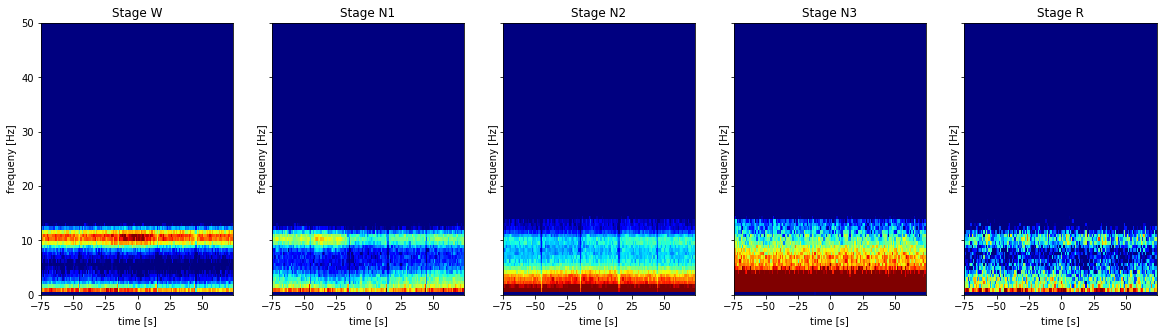

In [29]:
vsub.feature_visualization()

#### (B) By Frequency [NF]

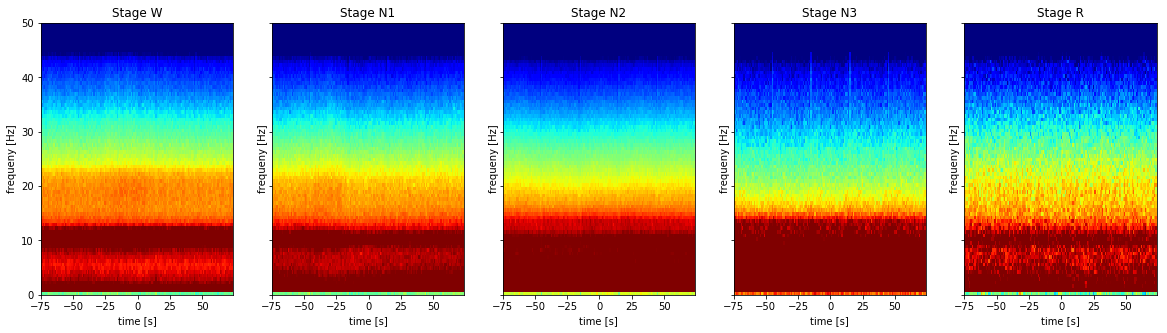

In [15]:
vsub.feature_visualization(normalization='TwoDFreqSubjScaler()')

#### (C) By Time [NT]

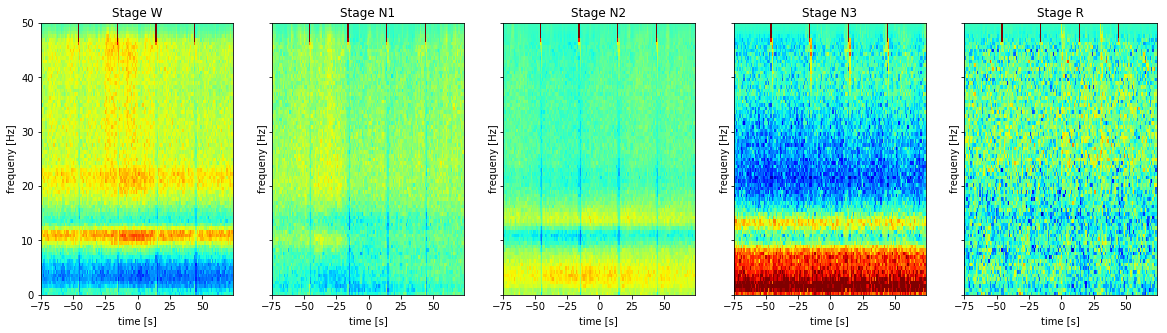

In [16]:
vsub.feature_visualization(normalization='TwoDTimeSubjScaler()')

#### (D) By Subject [N]

mean shape (1, 1, 1, 1)


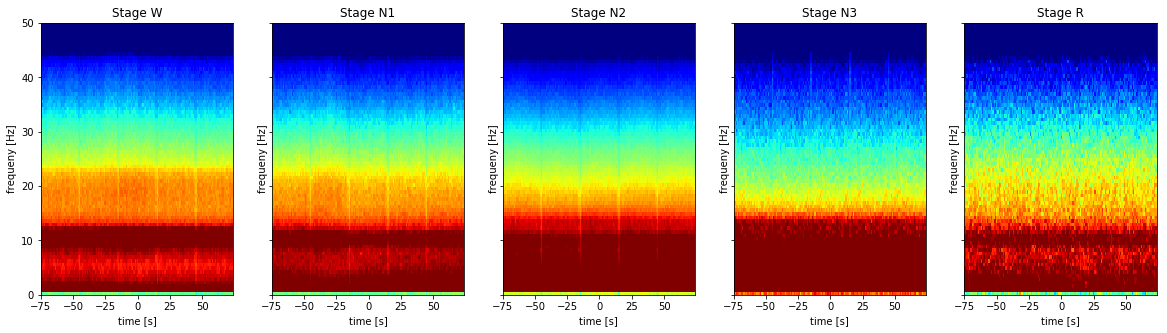

In [31]:
vsub.feature_visualization(normalization='TwoDFrequencyTimeSubjScaler()')

#### (E) By Frequency and Epoch [NFE]

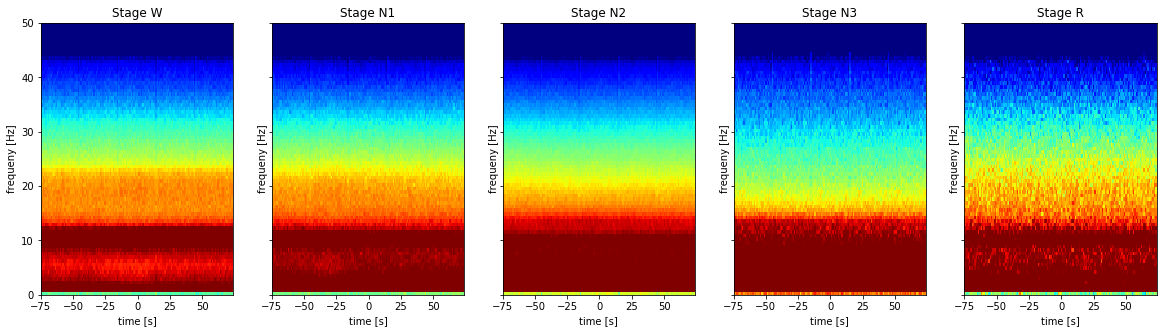

In [22]:
vsub.feature_visualization(normalization='TwoDFreqEpochScaler()')

#### (F) By Time and Epoch [NTE]

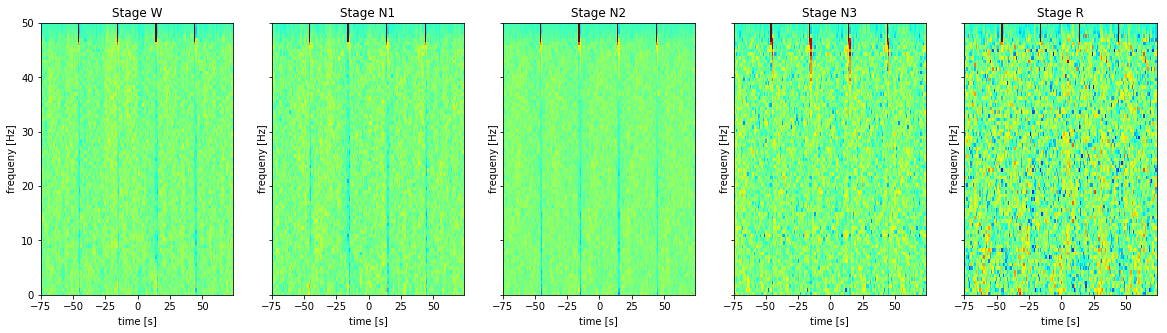

In [23]:
vsub.feature_visualization(normalization='TwoDTimeEpochScaler()')

#### (G) By Epoch [NE]

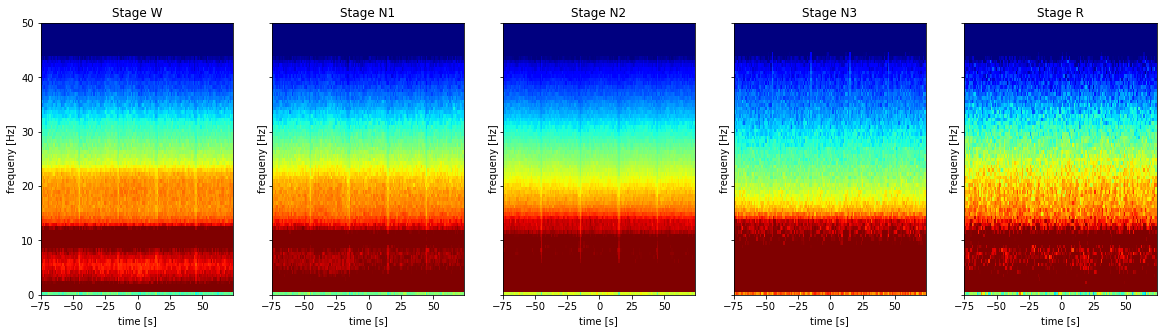

In [44]:
vsub.feature_visualization(normalization='TwoDScaler()')

## Evaluation

In [54]:
path = 'results/Physionet18/Normalization'
e = Evaluation(path)

model Single Channel (F3M2) with BN
config: N
runs: 2534-F3M2-N.pth.tar
config: NE
runs: 2530-F3M2-NE.pth.tar
config: NF
runs: 2529-F3M2-NF.pth.tar
config: NFE
runs: 2533-F3M2-NFE.pth.tar
config: NT
runs: 2528-F3M2-NT.pth.tar
config: NTE
runs: 2532-F3M2-NTE.pth.tar
config: U
runs: 2527-F3M2-U.pth.tar
model Single Channel (F3M2) without BN
config: N
runs: 2572-F3M2-N-NOBN.pth.tar
config: NE
runs: 2573-F3M2-NE-NOBN.pth.tar
config: NF
runs: 2571-F3M2-NF-NOBN.pth.tar
config: NFE
runs: 2569-F3M2-NFE-NOBN.pth.tar
config: NT
runs: 2570-F3M2-NT-NOBN.pth.tar
config: NTE
runs: 2568-F3M2-NTE-NOBN.pth.tar
config: U
runs: 2567-F3M2-U-NOBN.pth.tar


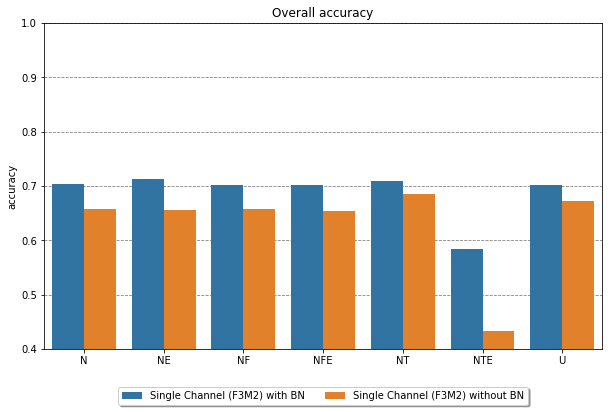

In [56]:
e.bar()

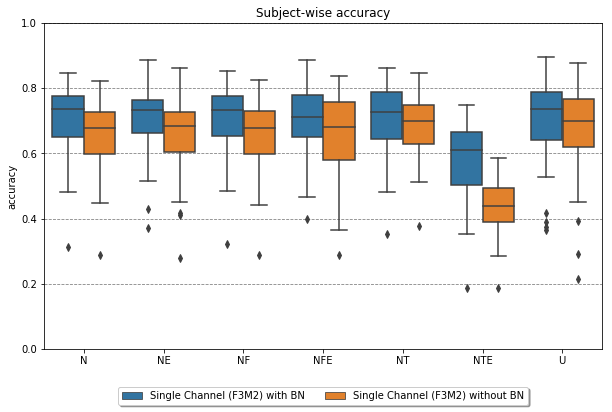

In [55]:
e.boxplot()